In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import optuna
data=pd.read_csv('train.csv')

In [38]:
data=pd.read_csv('train.csv')
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [39]:
data.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [40]:
features_to_drop=['state','account_length','area_code','total_day_calls','total_eve_calls','total_night_calls']

In [41]:
data.drop(features_to_drop,axis=1,inplace=True)

In [42]:
##Scaling the data
scaler = StandardScaler()
for i in data.columns:
    if data[i].dtype in ['int64', 'float64']:
        data[i] = scaler.fit_transform(data[[i]])
        

In [43]:
##One hot encoding and replace binary categorical values with 1 and 0

pd.set_option('future.no_silent_downcasting', True)
data.replace({'yes': 1, 'no': 0}, inplace=True)
data=data.infer_objects()
data=pd.get_dummies(data, columns=[i for i in data.columns if data[i].dtype not in ['int64', 'float64']])
data.replace({False: 0, True: 1}, inplace=True)
churn = data['churn']
data.drop('churn', axis=1, inplace=True)
data['churn'] = churn

In [44]:
data

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_charge,total_eve_minutes,total_eve_charge,total_night_minutes,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,1,1.366857,-0.345510,-0.345788,-0.093025,-0.092493,1.070003,1.070820,1.247901,-0.579164,1.248591,-0.426346,0
1,0,0,-0.567911,1.169136,1.169295,-1.571820,-1.572341,-0.753320,-0.752053,0.704379,0.232927,0.698342,-1.188960,0
2,1,0,-0.567911,2.206058,2.206218,-2.752070,-2.752473,-0.072057,-0.072337,-1.324770,1.045017,-1.328187,0.336268,0
3,1,0,-0.567911,-0.251076,-0.251027,-1.032448,-1.031447,-0.270676,-0.270956,-0.056552,-0.579164,-0.053219,1.098882,0
4,0,1,1.218029,0.702522,0.702027,2.952139,2.951497,0.239775,0.241038,-0.998657,1.045017,-0.992669,1.098882,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0,0,-0.567911,0.148880,0.148711,0.868291,0.867535,0.261623,0.263106,0.015918,0.638972,0.013885,-1.188960,0
4246,0,0,-0.567911,-0.043691,-0.044078,-1.372790,-1.373311,-0.284579,-0.284197,0.450735,0.638972,0.456769,1.098882,0
4247,0,0,-0.567911,-0.177010,-0.176961,-0.140792,-0.141665,-1.418694,-1.418526,-1.216066,1.045017,-1.220821,-0.426346,0
4248,0,1,2.408655,1.026560,1.026609,0.454308,0.455425,1.926052,1.927084,-0.129022,0.232927,-0.133743,0.336268,0


In [45]:
## Converting DF to numpy array 
data_np=np.array(data)
X=data_np[:,:-1]
y=data_np[:,-1].astype(int)

In [46]:
## Over sampling using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [48]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)


RandomForestClassifier()

In [49]:
from sklearn.inspection import permutation_importance



result = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)


forest_importances = pd.Series(result.importances_mean, index=data.columns[:-1])

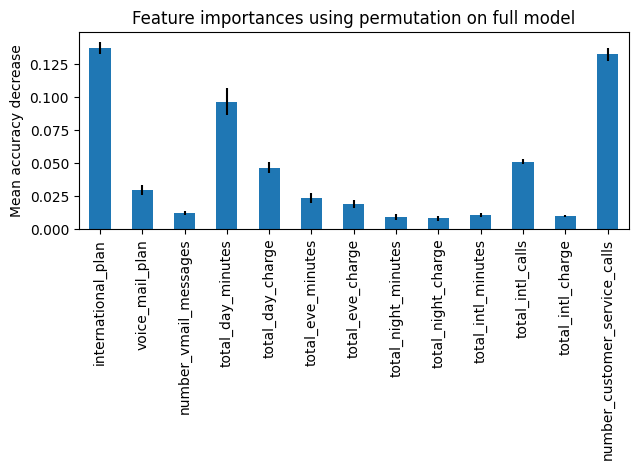

In [50]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [51]:
clf.score(X_test,y_test)

0.971252566735113

In [52]:
# from sklearn.decomposition import PCA
# pca=PCA(n_components=2)
# X_pca=pca.fit_transform(X)

In [53]:
# import matplotlib.pyplot as plt

# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA')
# plt.show()


In [54]:
##Define the objective function for Random Forest

from sklearn.ensemble import RandomForestClassifier


def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 2, 200)
    max_depth = trial.suggest_int('max_depth', 1, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)

    clf=RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=69)
    clf.fit(X_train, y_train)
    
    accuracy = clf.score(X_test, y_test)
    
    return accuracy

In [55]:
##Optimizing the Random Forest model, find the best hyperparameters

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=10)


[I 2024-05-21 13:26:16,422] A new study created in memory with name: no-name-7713a030-b939-4821-b327-1348d3521146


[I 2024-05-21 13:26:16,541] Trial 0 finished with value: 0.9644079397672827 and parameters: {'n_estimators': 16, 'max_depth': 28, 'min_samples_split': 8}. Best is trial 0 with value: 0.9644079397672827.
[I 2024-05-21 13:26:17,891] Trial 1 finished with value: 0.9596167008898016 and parameters: {'n_estimators': 199, 'max_depth': 31, 'min_samples_split': 17}. Best is trial 0 with value: 0.9644079397672827.
[I 2024-05-21 13:26:18,511] Trial 2 finished with value: 0.947296372347707 and parameters: {'n_estimators': 115, 'max_depth': 8, 'min_samples_split': 5}. Best is trial 0 with value: 0.9644079397672827.
[I 2024-05-21 13:26:18,577] Trial 3 finished with value: 0.8418891170431212 and parameters: {'n_estimators': 31, 'max_depth': 2, 'min_samples_split': 4}. Best is trial 0 with value: 0.9644079397672827.
[I 2024-05-21 13:26:19,740] Trial 4 finished with value: 0.9568788501026694 and parameters: {'n_estimators': 176, 'max_depth': 14, 'min_samples_split': 14}. Best is trial 0 with value: 0.9

In [56]:
##Train the model with the best hyperparameters

best_params=study_rf.best_params
n_estimators=best_params['n_estimators']
max_depth=best_params['max_depth']
min_samples_split=best_params['min_samples_split']

clf_rf=RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=69)
clf_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=28, min_samples_split=8, n_estimators=16,
                       random_state=69)

In [57]:
##Define the objective function for Neural Network with 1 hidden layer
from sklearn.neural_network import MLPClassifier
def objective_mlp(trial):
    hidden_layer_sizes = trial.suggest_int('hidden_layer_sizes', 10, 150)
  
    alpha = trial.suggest_float('alpha', 0.001, 0.5)

    from sklearn.neural_network import MLPClassifier
    clf=MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation='relu', solver='adam', alpha=alpha, random_state=69)
    clf.fit(X_train, y_train)
    
    accuracy = clf.score(X_test, y_test)
    
    return accuracy

In [58]:
##Optimizing the Neural Network model, find the best hyperparameters
study_nn=optuna.create_study(direction='maximize')
study_nn.optimize(objective_mlp, n_trials=10)

[I 2024-05-21 13:26:22,268] A new study created in memory with name: no-name-088760c9-ae6d-497c-9eb0-6a26f42ec596
/home/2fps/miniconda3/envs/conda_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-05-21 13:26:24,126] Trial 0 finished with value: 0.9260780287474333 and parameters: {'hidden_layer_sizes': 58, 'alpha': 0.2238538598012494}. Best is trial 0 with value: 0.9260780287474333.
/home/2fps/miniconda3/envs/conda_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-05-21 13:26:26,176] Trial 1 finished with value: 0.9226557152635181 and parameters: {'hidden_layer_sizes': 81, 'alpha': 0.35504365324195086}. Best is trial 0 with value: 0

In [59]:
best_params_nn=study_nn.best_params
hidden_layer_sizes=best_params_nn['hidden_layer_sizes']
alpha=best_params_nn['alpha']

clf_nn=MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation='relu', solver='adam', alpha=alpha, random_state=69)

clf_nn.fit(X_train, y_train)


/home/2fps/miniconda3/envs/conda_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.13728493400885686, hidden_layer_sizes=75, random_state=69)

In [60]:
def threshold_predict(y_pred, threshold):
    y_pred[y_pred>threshold]=1.
    y_pred[y_pred<=threshold]=0.
    return y_pred.reshape(-1,1)

In [61]:
##Classification report

from sklearn.metrics import classification_report

y_pred_rf=clf_rf.predict(X_test)

print(f"Random forest classification report:\n")
print(classification_report(y_test, y_pred_rf))

print(f"Neural network classification report:\n")
y_pred_nn=clf_nn.predict(X_test)

print(classification_report(y_test, y_pred_nn))

Random forest classification report:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       758
           1       0.97      0.95      0.96       703

    accuracy                           0.96      1461
   macro avg       0.96      0.96      0.96      1461
weighted avg       0.96      0.96      0.96      1461

Neural network classification report:

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       758
           1       0.94      0.91      0.93       703

    accuracy                           0.93      1461
   macro avg       0.93      0.93      0.93      1461
weighted avg       0.93      0.93      0.93      1461



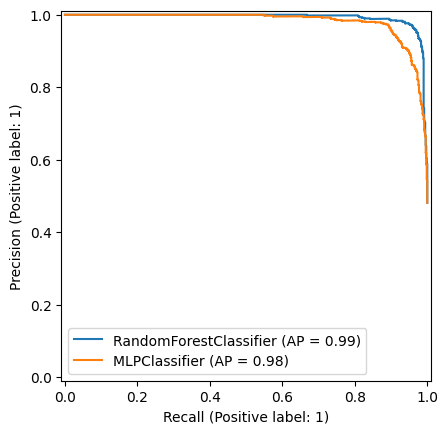

In [62]:
#Plot the Precision-Recall curve

from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt
ax=plt.gca()
rf_pr_display = PrecisionRecallDisplay.from_estimator(clf_rf, X_test, y_test, ax=ax)
nn_pr_display = PrecisionRecallDisplay.from_estimator(clf_nn, X_test, y_test, ax=ax)



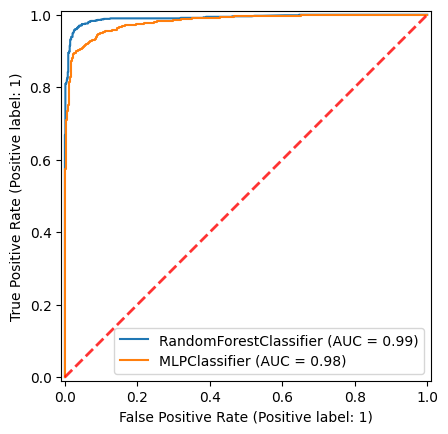

In [63]:
##Plot the ROC curve
from sklearn.metrics import RocCurveDisplay

ax=plt.gca()
rf_disp=RocCurveDisplay.from_estimator(clf_rf, X_test, y_test, ax=ax)
nn_disp=RocCurveDisplay.from_estimator(clf_nn, X_test, y_test, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)